# Bibliotecas

In [1]:
import sys
sys.path.append('/eos/user/t/thenriqu/Dark_Matter/LGBM_hhdm_analysis/')

import pprint
import json
from pathlib import Path
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import hepherolib.analysis as ana

from hhdm_analysis.utils import signal_label, stack_sorting, position, process_signals

ana.start()
plt.style.use("default")

# Configuração

In [2]:
period = '18'
year_style = 2018
dataset_year = "2018"
basedir = "/eos/user/t/thenriqu/Dark_Matter/Amostras/hhdmAnalysis_deepJet_Regions/datasets"

# Setup figure folders
dataset_name = basedir.split('/')[-2]
figures_path = f"./figures/{dataset_name}/{dataset_year}/machine_learning"
Path(figures_path).mkdir(parents=True, exist_ok=True)

# Data folder
data_path = f"./data/{dataset_name}/{dataset_year}"
Path(data_path).mkdir(parents=True, exist_ok=True)

# Lendo Metadata

In [3]:
with open("/eos/user/t/thenriqu/Dark_Matter/metadata.json", "r") as f:
    metadata = json.load(f)

# Carregando Datasets

In [4]:
base_model_name = "multi_signal"

with open(f"{data_path}/{base_model_name}-predicted-data.pickle", "rb") as f:
    ds = pickle.load(f)

# Preparando Datasets para o Plot

In [5]:
region_id = 0 # Signal region

# Prepare data to plot
colors_list = ["gainsboro", "orchid", "limegreen", "red", "skyblue", "darkgoldenrod"]
labels_list = [r"Residual SM", r"$WZ$", r"$ZZ$", "Single top", r"$t\bar{t}$", "Drell-Yan"]
bkg_list = ["Residual", "WZ", "ZZ", "ST", "TT", "DYJetsToLL"]
ds = {k: v[v.RegionID == region_id] for k,v in ds.items()}
dataframes, labels, colors = stack_sorting(ds, colors_list, labels_list, bkg_list)

      Datasets  Number of events
0  Residual SM       2565.160910
1         $ZZ$        467.194135
2         $WZ$        981.335215
3   Single top       6064.535021
4   $t\bar{t}$      29758.911906
5    Drell-Yan     149850.998322
Purity: 0.7899861418308093


# Definindo variáveis para o Plot

In [6]:
# Signals to use in plot
signal_to_use = process_signals([
    ("Signal_400_100", "darkviolet"),
    ("Signal_1000_100", "blue")
])

all_signals = process_signals([
    ("Signal_1000_100", "blue"),
    ("Signal_1000_200", "lightcoral"),
    ("Signal_1000_300", "chocolate"),
    ("Signal_1000_400", "darkorange"),
    ("Signal_1000_600", "moccasin"),
    ("Signal_1000_800", "goldenrod"),
    ("Signal_400_100", "darkviolet"),
    ("Signal_400_200", "yellowgreen"),
    ("Signal_500_100", "green"),
    ("Signal_500_200", "turquoise"),
    ("Signal_500_300", "darkcyan"),
    ("Signal_600_100", "cyan"),
    ("Signal_600_200", "indigo"),
    ("Signal_600_300", "violet"),
    ("Signal_600_400", "deeppink"),
    ("Signal_800_100", "crimson"),
    ("Signal_800_200", "red"),
    ("Signal_800_300", "saddlebrown"),
    ("Signal_800_400", "gainsboro"),
    ("Signal_800_600", "dimgray"),
])

# Variables to plot
var1 = "MLP_score_torch"
var2 = "LGB_score"
var3 = "MLP_score_keras"
xmin = 0
xmax = 1
nbins = 51
bins = np.linspace(xmin, xmax, nbins)

# MLP vs LGBM

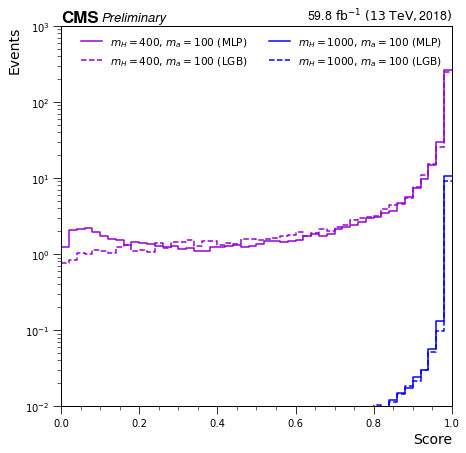

In [7]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (LGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e3]
)
# plt.savefig(f"{figures_path}/{base_model_name}-discriminators-lgb-mlp-keras.png", dpi=200, facecolor='white')
# plt.show()
# plt.close()

# Background vs Signal

# MLP vs LGBM + Background

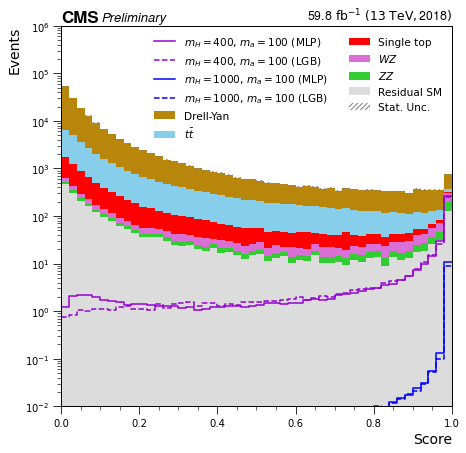

In [9]:
xlabel = "Score"

# Plot config
fig = plt.figure(figsize=(7,7))
grid = [1,1] # number of rows, number of cols
gspec = gs.GridSpec(grid[0], grid[1], width_ratios=[1], height_ratios=[1])

# Plot code
ax1 = plt.subplot(position(gspec, grid, main=1, sub=1)) # main is column number, sub is row number

for signal in signal_to_use:
    ana.step_plot(
        ax1, var3, ds[signal["key"]],
        label=signal["label"] + " (MLP)", color=signal["color"],
        weight="evtWeight", bins=bins
    )
    ana.step_plot(
        ax1, var2, ds[signal["key"]],
        label=signal["label"] + " (LGB)", color=signal["color"],
        weight="evtWeight", bins=bins, linestyle="--"
    )



ybkg, errbkg = ana.stacked_plot(ax1, var2, dataframes, labels, colors, weight="evtWeight", bins=bins)

ana.labels(ax1, ylabel="Events", xlabel=xlabel)
ana.style(
    ax1, lumi=metadata["luminosity"].get(dataset_year), year=year_style,
    ylog=True, legend_ncol=2, ylim=[1.e-2,1.e6]
)
# plt.savefig(f"{figures_path}/{base_model_name}-discriminators-lgb-mlp-keras-background.png", dpi=200, facecolor='white')
# plt.show()
# plt.close()